### Student Information
Name: 林宜靜

Student ID: 112034546

GitHub ID: SereneL

Kaggle name: moominnimoom

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here

### Take Home Exercises in DM2023-Lab2-master

#### Load data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import itertools

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger

import nltk
import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

from sklearn.cluster import KMeans

from sklearn.manifold import TSNE

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


##### Exercise 1

In [5]:
# Answer here

# train_df
count_vect_train_df = CountVectorizer()
train_df_counts = count_vect_train_df.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
train_df_sum_matrix = np.asarray(train_df_counts.sum(axis=0))

train_df_top_30_indices = np.argsort(train_df_sum_matrix[0])[::-1][:30]
print('Word frequency for Top 30 words in training dataset:')
print(count_vect_train_df.get_feature_names_out()[train_df_top_30_indices])

# test_df
count_vect_test_df = CountVectorizer()
test_df_counts = count_vect_test_df.fit_transform(test_df.text) #learn the vocabulary and return document-term matrix
test_df_sum_matrix = np.asarray(test_df_counts.sum(axis=0))

test_df_top_30_indices = np.argsort(test_df_sum_matrix[0])[::-1][:30]
print('\nWord frequency for Top 30 words in testing dataset:')
print(count_vect_test_df.get_feature_names_out()[test_df_top_30_indices])

Word frequency for Top 30 words in training dataset:
['the' 'to' 'and' 'you' 'of' 'is' 'it' 'in' 'that' 'my' 'for' 'on' 'be'
 'me' 'this' 'so' 'have' 'not' 'just' 'but' 'with' 'at' 'can' 'like' 'all'
 'are' 'your' 'was' 'when' 'if']

Word frequency for Top 30 words in testing dataset:
['the' 'to' 'and' 'it' 'of' 'you' 'is' 'in' 'for' 'that' 'my' 'on' 'be'
 'me' 'was' 'so' 'can' 'at' 'have' 'all' 'just' 'are' 'with' 'but' 'get'
 'your' 'up' 'this' 'like' 'not']


#### Save data

In [6]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

#### EDA

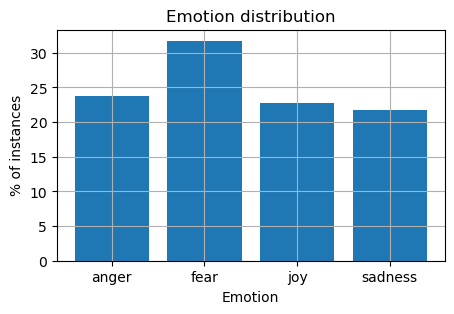

In [7]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

%matplotlib inline

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

#### Feature engineering

In [8]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [9]:
type(train_data_BOW_features)

# add .toarray() to show
train_data_BOW_features.toarray()

# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

"😂" in feature_names

False

In [10]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
print(train_data_BOW_features_500.shape)

train_data_BOW_features_500.toarray()

(3613, 500)


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
print(feature_names_500[100:110])

"😂" in feature_names_500

['change' 'cheer' 'cheerful' 'cheerfully' 'cheering' 'cheery' 'come'
 'comes' 'could' 'country']


True

##### Exercise 2

In [12]:
# Answer here
tfidf_1000 = TfidfVectorizer(max_features=1000)
train_data_tfidf_features_1000 = tfidf_1000.fit_transform(train_df['text'])
feature_names_1000 = tfidf_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---

#### Model

In [13]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [14]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


training accuracy: 0.99
testing accuracy: 0.68
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



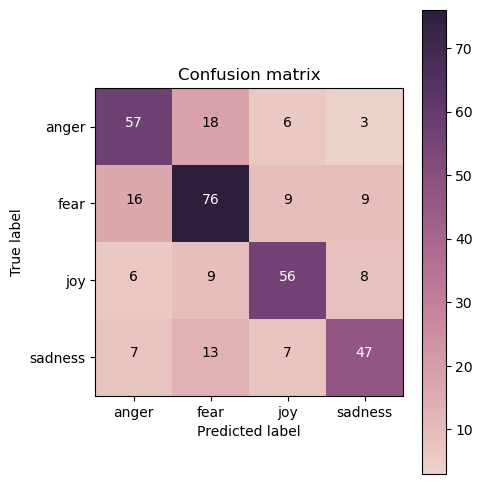

In [15]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

##### Exercise 3

In [16]:
# Answer here
# To most of the data, the classifier predicted them well(True Positive).
# Also found that when labels are anger/fear, the classifier tend to misclassify them to fear/anger.

##### Exercise 4

training accuracy: 0.79
testing accuracy: 0.7


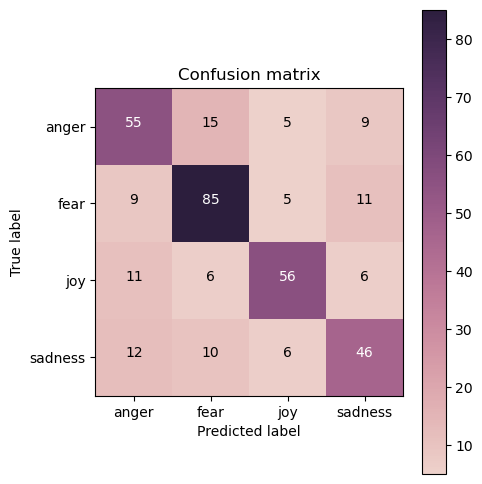

In [17]:
# Answer here
nb_model = MultinomialNB(force_alpha=True)
nb_model = nb_model.fit(X_train, y_train)

y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

##### Exercise 5

In [18]:
# Answer here
"""
Although the accuracy of training data from Naive Bayes model is worse than Decision Tree, 
the difference in the accuracy of training and testing data from Naive Bayes is much lower than in Decision Tree.
It may shows that the model is less overfitting in Naive Bayes.
"""

'\nAlthough the accuracy of training data from Naive Bayes model is worse than Decision Tree, \nthe difference in the accuracy of training and testing data from Naive Bayes is much lower than in Decision Tree.\nIt may shows that the model is less overfitting in Naive Bayes.\n'

---

#### Deep learning

In [19]:
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [20]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 483     anger
22      anger
2375      joy
73      anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [21]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [22]:
# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0   

In [23]:
csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


113/113 [==============================] - 2s 4ms/step - loss: 1.3195 - accuracy: 0.3786 - val_loss: 1.2661 - val_accuracy: 0.4582
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9713 - accuracy: 0.6554 - val_loss: 0.9107 - val_accuracy: 0.6657
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7988 - val_loss: 0.7613 - val_accuracy: 0.7003
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8503 - val_loss: 0.7508 - val_accuracy: 0.7118
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8754 - val_loss: 0.7615 - val_accuracy: 0.7061
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.9059 - val_loss: 0.8269 - val_accuracy: 0.6830
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9286 - val_loss: 0.8964 - val_accuracy: 0.7147
Epoc

In [24]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[7.1415468e-04, 9.5240152e-01, 8.5965283e-03, 3.8287781e-02],
       [1.0172867e-01, 8.7162536e-01, 1.7875623e-02, 8.7703848e-03],
       [4.4681484e-01, 2.3793775e-01, 3.1462136e-01, 6.2604819e-04],
       [3.3376631e-11, 1.0000000e+00, 2.2225738e-08, 3.3487684e-09],
       [4.5157843e-03, 4.9862148e-08, 2.8366386e-04, 9.9520051e-01]],
      dtype=float32)

In [25]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'anger', 'fear', 'sadness'], dtype=object)

In [26]:
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [27]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.378633,1.319494,0.458213,1.266134
1,1,0.655411,0.971333,0.665706,0.910709
2,2,0.798782,0.582005,0.700288,0.761270
3,3,0.850263,0.414248,0.711816,0.750820
4,4,0.875450,0.336217,0.706052,0.761452
5,5,0.905895,0.267985,0.682997,0.826938
6,6,0.928591,0.218072,0.714697,0.896372
7,7,0.941877,0.187728,0.691643,0.920293
8,8,0.950180,0.161672,0.677233,1.008220
9,9,0.960144,0.133628,0.668588,1.084167


##### Exercise 6

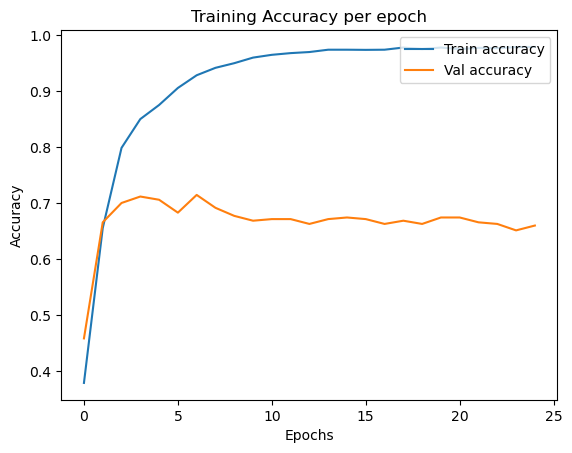

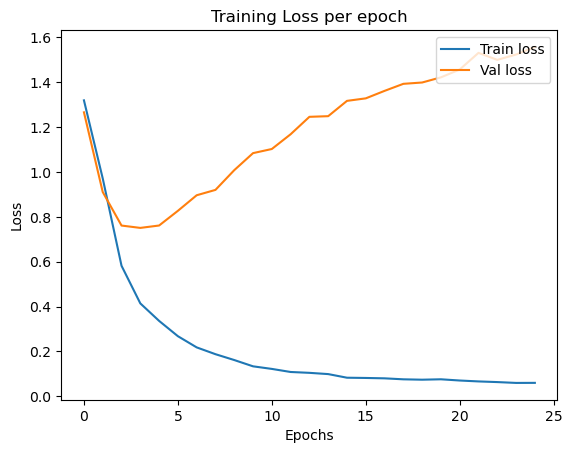

'\nFrom the figures below, \nI found that the training accuracy increases while the validation accuracy remains the same, \nand the training loss decreases while the validation loss increases,\nwhich indicate overfitting.\n'

In [28]:
# Answer here
plt.plot(training_log['accuracy'])
plt.plot(training_log['val_accuracy'])
plt.title('Training Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy', 'Val accuracy'], loc='upper right')
plt.show()

plt.plot(training_log['loss'])
plt.plot(training_log['val_loss'])
plt.title('Training Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train loss', 'Val loss'], loc='upper right')
plt.show()

# Interpretation

"""
From the figures below, 
I found that the training accuracy increases while the validation accuracy remains the same, 
and the training loss decreases while the validation loss increases,
which indicate overfitting.
"""

#### Word2Vec

In [29]:
# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
483,10483,Are belittling kitty straight a service? provo...,"[Are, belittling, kitty, straight, a, service,..."
22,10022,I got a NO RESPONSE again from an #irate custo...,"[I, got, a, NO, RESPONSE, again, from, an, #, ..."
2375,30371,It's not that the man did not know how to jugg...,"[It, 's, not, that, the, man, did, not, know, ..."
73,10073,Absolutely fuming I've just scratched all my c...,"[Absolutely, fuming, I, 've, just, scratched, ..."
558,10558,@kingcharles9th i Lowkey forgot you had twitte...,"[@, kingcharles9th, i, Lowkey, forgot, you, ha..."


In [30]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Are', 'belittling', 'kitty', 'straight', 'a', 'service', '?', 'provoke', 'lift', 'aboard', '!', ':', 'Wycelv']),
       list(['I', 'got', 'a', 'NO', 'RESPONSE', 'again', 'from', 'an', '#', 'irate', 'customer', 'of', '#', 'amazon', '😞😞\\nwhy', 'ca', "n't", 'they', 'understand', 'that', 'it', "'s", 'not', 'always', 'amazon', 'fault', '..', '\\n', '#', 'carrierfault']),
       list(['It', "'s", 'not', 'that', 'the', 'man', 'did', 'not', 'know', 'how', 'to', 'juggle', ',', 'he', 'just', 'did', "n't", 'have', 'the', 'balls', 'to', 'do', 'it', '.', '\\n', '#', 'funny', '#', 'pun', '#', 'punny', '#', 'lol', '#', 'hilarious'])],
      dtype=object)

In [31]:
## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [32]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.65884346,  0.32008788, -0.29726318, -0.1842607 ,  0.03026353,
       -1.0516367 ,  0.11376313,  1.4113706 , -0.42006558, -0.6521983 ,
       -0.38049805, -0.9526898 , -0.2578126 ,  0.6926382 , -0.2275273 ,
       -0.42336467,  0.3362732 , -0.4507101 ,  0.8768593 , -0.56182736,
        0.41927907,  0.9611105 ,  0.45037422,  0.21027228,  0.14973293,
        0.41197982, -0.67663306,  0.5760927 , -0.2378174 ,  0.29417065,
        0.66500646, -0.25219765,  0.46229175, -0.562064  , -0.22598343,
        0.00660573, -0.06416591,  0.04763732, -0.37248737, -0.5262855 ,
        0.30953372,  0.10419147, -0.4952849 ,  0.85816777,  0.92384595,
       -0.0515049 , -0.86529046, -0.19011079,  0.4934189 ,  0.18155509,
       -0.26846498, -0.37647313,  0.12752372,  0.01628912, -0.32521567,
       -0.42726198,  0.1533601 , -0.34701177,  0.11768927,  0.40170968,
        0.33669597, -0.10994487,  0.3392172 ,  0.40385678, -1.031792  ,
        0.8157969 ,  0.14732547,  0.55466646, -1.1562902 ,  0.71

In [33]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9280518293380737),
 ('birthday', 0.9215723276138306),
 ('blessed', 0.9167580604553223),
 ('successful', 0.9134177565574646),
 ('PUSSY\\nP', 0.9069334268569946),
 ('right', 0.9051640033721924),
 ('dad', 0.9048972725868225),
 ('melancholic', 0.8994370102882385),
 ('establishment', 0.8979052901268005),
 ('help', 0.8973171710968018)]

In [35]:
## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.917618453502655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

##### Exercise 7

In [37]:
# Answer here
"""
1. Averaging word vectors: 
    Calculate the average of all word vectors in the sentence.
2. Weighted Averaging: 
    Assign weights to each word vector based on its importance in the sentence. 
    This can be determined by word frequency, TF-IDF (Term Frequency-Inverse Document Frequency), 
    or other weighting schemes.
3. Utilize Doc2Vec:
    Utilize models like Doc2Vec, which are designed to generate paragraph vectors. 
4. Use RNN and LSTM:
    Use recurrent neural networks or LSTMs to process sequences of word vectors. 
    The hidden state of the network after processing the entire sequence can be used as the representation of the sentence.
...
"""
# Averaging word vectors:
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    num_words = 0
    for word in words:
        if word in model.wv:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if num_words > 0:
        feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

words = 'Calculate the average of all word vectors in the sentence.'
average_word_vectors(words, word2vec_model, 100)

array([-0.11131855,  0.23806054,  0.01967887,  0.02188433,  0.01407374,
       -0.44777487,  0.14495691,  0.71073286, -0.23851927, -0.3679857 ,
       -0.20171913, -0.37894976, -0.03693708,  0.15004417,  0.12346188,
       -0.30377022,  0.19701937, -0.31420226,  0.06524915, -0.55807147,
        0.17904904,  0.13720769,  0.34150101, -0.0652779 , -0.08125094,
        0.07879086, -0.16939434, -0.09468823, -0.179746  ,  0.110004  ,
        0.19858424, -0.04051651,  0.12350676, -0.2480731 , -0.0878132 ,
        0.24928234, -0.08259642, -0.12725941, -0.30583575, -0.47363642,
        0.21350865, -0.29420099, -0.10644084,  0.25479644,  0.21308757,
       -0.10591538, -0.36818032, -0.17488604,  0.16892194,  0.12092724,
        0.03039693, -0.26513331, -0.08179615, -0.12432918, -0.20354277,
        0.14014528,  0.16646114, -0.17859473, -0.27056257,  0.01432577,
        0.0861302 , -0.0489651 ,  0.02941134,  0.11267961, -0.27075981,
        0.40052072,  0.22400888,  0.36310312, -0.5116959 ,  0.43

#### Clustering

In [38]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [39]:
# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


In [40]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [41]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

#### High-dimension visulization: t-SNE

In [42]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


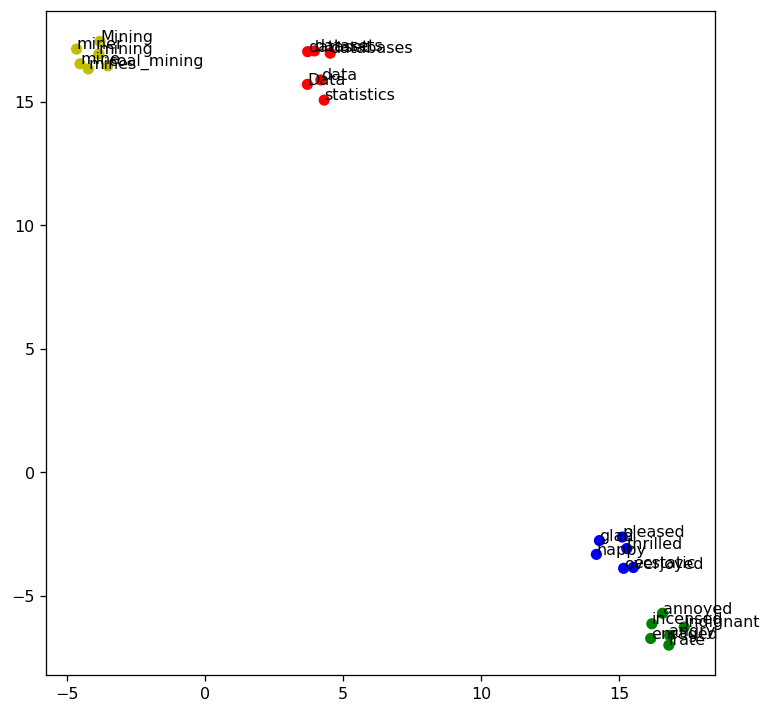

In [43]:
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

##### Exercise 8

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'happy', 'glad', 'plea

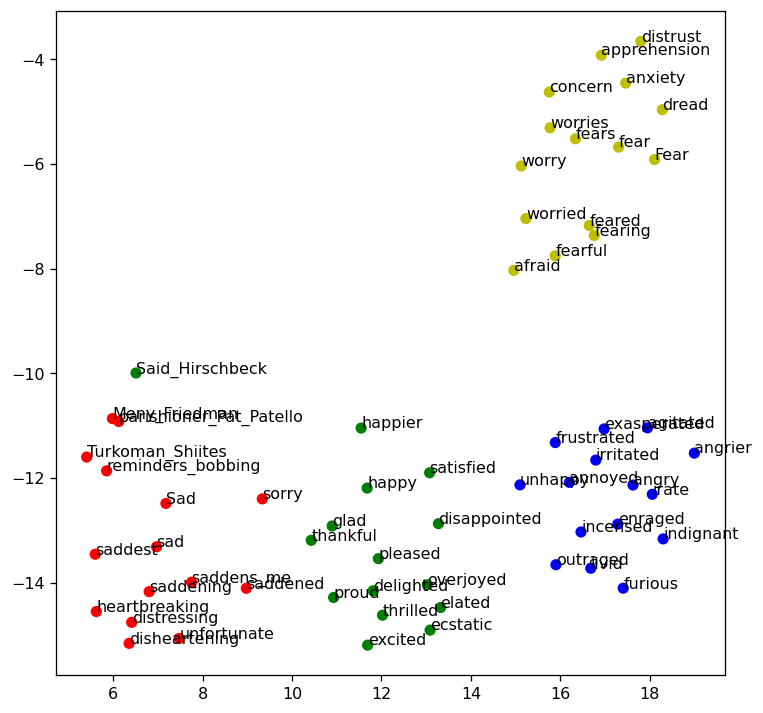

In [44]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 14
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### Kaggle competition

#### Import package

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import itertools

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

import spacy
from contractions import fix
from spellchecker import SpellChecker
from collections import Counter

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\908\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\908\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\908\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Read data

In [83]:
iden_df = pd.read_csv(r'dm2023-isa5810-lab2-homework/data_identification.csv')
iden_df

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [84]:
emotion_df = pd.read_csv(r'dm2023-isa5810-lab2-homework/emotion.csv')
emotion_df

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


Parsing json file

In [48]:
# data = {
#     'tweet_id': [],
#     'text': [],
#     'crawl_date': [],
#     'hashtag': [],
#     'score': [],
#     'data_type': [],
#     'index': []
# }

In [49]:
# path = r'dm2023-isa5810-lab2-homework/tweets_DM.json'

# with open(path, 'r') as openfile:
#     for line in openfile:
        
#         json_object = json.loads(line)
# #         json_formatted_str = json.dumps(json_object, indent=4)
# #         print(json_formatted_str)
        
#         score = json_object["_score"]
#         index = json_object['_index']
#         hashtag = json_object['_source']['tweet']['hashtags']
#         tweet_id = json_object["_source"]["tweet"]["tweet_id"]
#         text = json_object["_source"]["tweet"]["text"]
#         crawl_date = json_object['_crawldate']
#         data_type = json_object['_type']
        
#         data['tweet_id'].append(tweet_id) if tweet_id != None or tweet_id != '' else data['tweet_id'].append(np.nan)
#         data['text'].append(text) if text != None or text != '' else data['text'].append(np.nan)
#         data['crawl_date'].append(crawl_date) if crawl_date != None or crawl_date != '' else data['crawl_date'].append(np.nan)
#         data['hashtag'].append(hashtag) if len(hashtag) != 0 else data['hashtag'].append(np.nan)
#         data['score'].append(score) if score != None or score != '' else data['score'].append(np.nan)
#         data['data_type'].append(data_type) if data_type != None or data_type != '' else data['data_type'].append(np.nan)
#         data['index'].append(index) if index != None or index != '' else data['index'].append(np.nan)


In [50]:
# Save data to csv
# DATA = pd.DataFrame(data)
# DATA.to_csv('tweets_DM.csv', index=False)

tweets_DM.csv: raw data in dataframe<br>
If executing the below code is needed, please click [this link](https://drive.google.com/file/d/1PR3FzaeS0DQFRh5fvuLSF7rY-mk5GntZ/view?usp=sharing) and download the csv file.<br>
And put the csv under the same folder as this Homework.ipynb file.

In [85]:
DATA = pd.read_csv('tweets_DM.csv')  # please download the file from the above link ><

In [52]:
DATA = DATA.merge(iden_df, on='tweet_id', how='left')

In [53]:
train_df = DATA[DATA['identification'] == 'train']
train_df = train_df.merge(emotion_df, on='tweet_id', how='left')
train_df.drop('identification', axis=1, inplace=True)
train_df

,tweet_id,text,crawl_date,hashtag,score,data_type,index,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",2015-05-23 11:42:47,['Snapchat'],391,tweets,hashtag_tweets,anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",2016-01-28 04:52:09,"['freepress', 'TrumpLegacy', 'CNN']",433,tweets,hashtag_tweets,sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,2016-01-24 23:53:05,NaN,376,tweets,hashtag_tweets,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,2015-06-11 04:44:05,"['authentic', 'LaughOutLoud']",120,tweets,hashtag_tweets,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,2015-08-18 02:30:07,NaN,1021,tweets,hashtag_tweets,anticipation
...,...,...,...,...,...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,2016-12-26 02:44:07,"['NoWonder', 'Happy']",94,tweets,hashtag_tweets,joy
1455559,0x38959e,In every circumtance I'd like to be thankful t...,2015-04-01 08:14:56,NaN,627,tweets,hashtag_tweets,joy
1455560,0x2cbca6,there's currently two girls walking around the...,2016-11-17 23:46:22,['blessyou'],274,tweets,hashtag_tweets,joy
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",2016-09-02 14:25:06,NaN,840,tweets,hashtag_tweets,joy


#### Preprocessing

<b>First, I tokenize the sentence, then remove stop words, and perform lemmatization.<br>
I also tried to do the above steps using spaCy and BertTokenizer but did not finish these 2 preprocessing experiments.
</b>

In [55]:
nlp = spacy.load("en_core_web_sm")
spell = SpellChecker()

In [56]:
stop_words = set(stopwords.words('english'))
stop_words.add('lh')
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'lh',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'ow

In [57]:
lemmatizer = WordNetLemmatizer()

In [58]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

In [81]:
# def preprocess_text(text):
#     # Handle contractions
#     text = fix(text)

#     # Tokenize the text using spaCy
#     doc = nlp(text)
    
#     # Lemmatize, lowercase, and remove stopwords
#     tokens = [token.lemma_.lower() for token in doc if token.is_alpha and token.lemma_.lower() not in stop_words]

#     # Spell checking
#     tokens = [spell.correction(word) for word in tokens]

In [59]:
train_df['tokenized_text'] = train_df['text'].apply(preprocess_text)
train_df.head()

,tweet_id,text,crawl_date,hashtag,score,data_type,index,emotion,tokenized_text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",2015-05-23 11:42:47,['Snapchat'],391,tweets,hashtag_tweets,anticipation,"[people, post, add, snapchat, must, dehydrated..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",2016-01-28 04:52:09,"['freepress', 'TrumpLegacy', 'CNN']",433,tweets,hashtag_tweets,sadness,"[brianklaas, see, trump, dangerous, freepress,..."
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,2016-01-24 23:53:05,NaN,376,tweets,hashtag_tweets,fear,"[issa, stalking, tasha]"
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,2015-06-11 04:44:05,"['authentic', 'LaughOutLoud']",120,tweets,hashtag_tweets,joy,"[riskshow, thekevinallison, thx, best, time, t..."
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,2015-08-18 02:30:07,NaN,1021,tweets,hashtag_tweets,anticipation,"[still, waiting, supply, liscus]"


#### Word2Vec

Here I represent words as vectors in a continuous vector space using Word2Vec.<br>
And by calculating the average of all word vectors in the sentence to represent the sentence data then train the model.<br>
Parameter settings are listed below:<br>
1. vector_size=150
2. window=5
3. min_count=2
4. workers=4
5. epochs=100
<br>


In [60]:
model_w2v = Word2Vec(sentences=train_df['tokenized_text'], vector_size=150, window=5, min_count=2, workers=4, epochs=100)

In [61]:
# Feature extraction using Word2Vec
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    num_words = 0
    for word in words:
        if word in model.wv:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if num_words > 0:
        feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

In [62]:
train_df['word2vec_features'] = train_df['tokenized_text'].apply(lambda x: average_word_vectors(x, model_w2v, 150))

In [63]:
label_encoder = LabelEncoder()

In [64]:
train_df['emotion_encoded'] = label_encoder.fit_transform(train_df['emotion'])
train_df.head()

,tweet_id,text,crawl_date,hashtag,score,data_type,index,emotion,tokenized_text,word2vec_features,emotion_encoded
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",2015-05-23 11:42:47,['Snapchat'],391,tweets,hashtag_tweets,anticipation,"[people, post, add, snapchat, must, dehydrated...","[0.5139289209619164, -0.7515904204919934, 0.70...",1
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",2016-01-28 04:52:09,"['freepress', 'TrumpLegacy', 'CNN']",433,tweets,hashtag_tweets,sadness,"[brianklaas, see, trump, dangerous, freepress,...","[-0.030289098620414734, -0.7453021738264296, 0...",5
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,2016-01-24 23:53:05,NaN,376,tweets,hashtag_tweets,fear,"[issa, stalking, tasha]","[2.352804740269979, -0.35278983414173126, 0.38...",3
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,2015-06-11 04:44:05,"['authentic', 'LaughOutLoud']",120,tweets,hashtag_tweets,joy,"[riskshow, thekevinallison, thx, best, time, t...","[-0.03668497562069784, -0.027015848593278366, ...",4
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,2015-08-18 02:30:07,NaN,1021,tweets,hashtag_tweets,anticipation,"[still, waiting, supply, liscus]","[-1.2336694796880086, 0.3577449123064677, 1.64...",1


#### Modeling

In [65]:
X = pd.DataFrame(train_df['word2vec_features'].tolist())
y = train_df['emotion_encoded']

In [66]:
X

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.513929,-0.751590,0.707873,-0.585760,0.119458,0.552026,-0.722359,-1.148767,-0.199605,0.082951,...,1.072655,0.732591,0.395503,0.369883,0.371851,0.738396,0.494011,0.983886,0.839183,-0.631647
1,-0.030289,-0.745302,0.005679,-0.838883,0.797741,-1.594276,0.563459,-0.307129,0.424236,-0.538415,...,-0.428213,-0.596657,0.246759,-0.691101,-0.789313,0.444060,1.483365,0.251412,0.203246,0.248348
2,2.352805,-0.352790,0.383611,1.371018,0.507727,-0.873997,-1.875642,-1.452374,-0.014196,0.797525,...,2.226798,0.786106,0.209207,0.619430,0.033994,1.795338,-0.125839,0.887126,0.887187,1.990027
3,-0.036685,-0.027016,0.508451,-0.148469,-0.464538,0.443024,-0.197823,-0.857911,-0.363539,0.398215,...,0.645560,-0.088374,-0.469436,-0.375362,0.089303,0.549348,-0.728071,1.044041,-0.485567,-0.441915
4,-1.233669,0.357745,1.640725,0.416335,-0.063855,-0.317985,-0.461435,-1.152029,0.211542,1.052638,...,-0.568986,0.138005,-0.462915,0.390888,0.379116,1.953416,-0.913115,-0.343248,1.366226,1.599510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455558,-0.815248,0.078524,0.367391,0.031876,-0.804513,0.396704,0.232663,-0.385034,0.442501,-0.165179,...,-0.028121,-0.638959,-0.404235,-0.327729,-0.201904,-0.029265,-1.125939,1.231591,0.556648,0.517796
1455559,-0.462098,-0.506970,1.676454,-0.768850,0.429112,0.420765,-0.493796,-0.552064,0.714578,-0.844603,...,-1.035675,-0.723928,-0.252935,0.125416,0.603243,1.356336,-0.822288,1.001534,0.288804,1.029387
1455560,-0.290689,-0.066089,1.479035,0.352846,-0.316191,0.311115,-0.644407,-0.567473,-0.099847,1.096386,...,-0.247959,0.343528,0.244026,-0.467935,-0.355774,0.961169,0.764443,-0.484526,0.260704,-1.022775
1455561,0.849442,-0.680814,0.612846,-0.127831,0.429974,-0.203521,0.582526,-0.652309,-0.107726,0.238946,...,-0.311793,0.692780,-0.761060,0.429211,0.369255,0.694639,-0.171425,1.039737,0.196866,0.299672


In [67]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<b> I also tried CatBoost but the result is worse than XGBoost </b><br>
so I choose XGBoost at the end.

In [68]:
# Train XGBoost classifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [69]:
# Make predictions on the test set
y_pred = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5141336869188253


In [70]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1081,   494,  1388,    74,  3076,  1691,    11,   131],
       [   76, 25440,  1712,   328, 18480,  2408,    39,  1501],
       [  227,  1212, 10274,   324,  8915,  6121,    60,   536],
       [   26,  1074,   806,  3906,  5533,  1226,    25,   250],
       [  107,  7829,  2989,   575, 83149,  4357,    86,  3851],
       [  244,  1981,  5625,   329, 13898, 15891,    79,   698],
       [   27,   623,  1257,   152,  4650,  1706,  1192,   209],
       [   38,  4649,  1483,   205, 24102,  1918,    31,  8738]],
      dtype=int64)

In [71]:
# Calculate macro-average F1 score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro-Average F1 Score: {macro_f1}")

# Calculate micro-average F1 score
micro_f1 = f1_score(y_test, y_pred, average='micro')
print(f"Micro-Average F1 Score: {micro_f1}")

Macro-Average F1 Score: 0.39293192522660114
Micro-Average F1 Score: 0.5141336869188253


#### Prediction

In [72]:
test_df = DATA[DATA['identification'] == 'test']
test_df.drop('identification', axis=1, inplace=True)
test_df

,tweet_id,text,crawl_date,hashtag,score,data_type,index
2,0x28b412,"Confident of your obedience, I write to you, k...",2017-12-25 04:39:20,['bibleverse'],232,tweets,hashtag_tweets
4,0x2de201,"""Trust is not the same as faith. A friend is s...",2016-01-08 17:18:59,NaN,989,tweets,hashtag_tweets
9,0x218443,When do you have enough ? When are you satisfi...,2015-09-09 09:22:55,"['materialism', 'money', 'possessions']",66,tweets,hashtag_tweets
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",2015-10-10 14:33:26,"['GodsPlan', 'GodsWork']",104,tweets,hashtag_tweets
33,0x26289a,"In these tough times, who do YOU turn to as yo...",2016-10-23 08:49:50,NaN,310,tweets,hashtag_tweets
...,...,...,...,...,...,...,...
1867525,0x2913b4,"""For this is the message that ye heard from th...",2016-12-10 18:01:00,NaN,602,tweets,hashtag_tweets
1867529,0x2a980e,"""There is a lad here, which hath five barley l...",2015-01-04 14:40:55,NaN,598,tweets,hashtag_tweets
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,2015-05-12 12:51:52,"['mixedfeeling', 'butimTHATperson']",827,tweets,hashtag_tweets
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,2017-10-02 17:54:04,NaN,368,tweets,hashtag_tweets


In [73]:
test_df['tokenized_text'] = test_df['text'].apply(preprocess_text)
test_df['word2vec_features'] = test_df['tokenized_text'].apply(lambda x: average_word_vectors(x, model_w2v, 150))
test_df.head()

,tweet_id,text,crawl_date,hashtag,score,data_type,index,tokenized_text,word2vec_features
2,0x28b412,"Confident of your obedience, I write to you, k...",2017-12-25 04:39:20,['bibleverse'],232,tweets,hashtag_tweets,"[confident, obedience, write, knowing, even, a...","[0.34310251055285335, -0.2832018993794918, 1.3..."
4,0x2de201,"""Trust is not the same as faith. A friend is s...",2016-01-08 17:18:59,NaN,989,tweets,hashtag_tweets,"[trust, faith, friend, someone, trust, putting...","[-0.10121690481901169, -0.6859878387132828, 0...."
9,0x218443,When do you have enough ? When are you satisfi...,2015-09-09 09:22:55,"['materialism', 'money', 'possessions']",66,tweets,hashtag_tweets,"[enough, satisfied, goal, really, money, mater...","[0.39044864708557725, 0.1851278729736805, 0.62..."
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",2015-10-10 14:33:26,"['GodsPlan', 'GodsWork']",104,tweets,hashtag_tweets,"[god, woke, chase, day, godsplan, godswork]","[0.12399929389357567, -0.6902452744543552, 1.7..."
33,0x26289a,"In these tough times, who do YOU turn to as yo...",2016-10-23 08:49:50,NaN,310,tweets,hashtag_tweets,"[tough, time, turn, symbol, hope]","[0.09207731261849403, -0.3216698169708252, 1.8..."


In [74]:
X_test = pd.DataFrame(test_df['word2vec_features'].tolist())

In [75]:
y_pred_test = model_xgb.predict(X_test)

In [76]:
y_pred_test = label_encoder.inverse_transform(y_pred_test)
len(y_pred_test)

411972

In [77]:
y_pred = pd.DataFrame(test_df['tweet_id'])
y_pred['emotion'] = y_pred_test
y_pred = y_pred.reset_index(drop=True)
y_pred

,tweet_id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,joy
3,0x2939d5,joy
4,0x26289a,joy
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,joy
411969,0x316b80,sadness
411970,0x29d0cb,joy


#### Output file

In [78]:
sample_submission = pd.read_csv(r'dm2023-isa5810-lab2-homework/sampleSubmission.csv')
sample_submission['id']

0         0x2c7743
1         0x2c1eed
2         0x2826ea
3         0x356d9a
4         0x20fd95
            ...   
411967    0x351857
411968    0x2c028e
411969    0x1f2430
411970    0x2be24e
411971    0x35802a
Name: id, Length: 411972, dtype: object

In [79]:
submission_df = pd.DataFrame(sample_submission['id']).merge(y_pred, left_on='id', right_on='tweet_id', how='left')
submission_df.drop('tweet_id', axis=1, inplace=True)
submission_df

,id,emotion
0,0x2c7743,joy
1,0x2c1eed,joy
2,0x2826ea,sadness
3,0x356d9a,joy
4,0x20fd95,joy
...,...,...
411967,0x351857,disgust
411968,0x2c028e,sadness
411969,0x1f2430,anticipation
411970,0x2be24e,trust


In [80]:
submission_df.to_csv('submissions/word2vec_xgb_v2.csv', index=False)